In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [2]:
connex = sqlite3.connect('database.sqlite')
cur = connex.cursor()

In [3]:
loanbook = pd.read_sql_query('select * from loan;', connex)
loanbook.describe()

,index,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,887383.000000,8.873820e+05,887382.000000,887382.000000,887382.000000,887382.000000,8.873780e+05,887382.00000,887353.000000,887353.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171060e+05,21372.000000,21372.000000,21372.000000
mean,152155.671062,3.500184e+07,14755.280082,14741.893147,14702.480039,436.717647,7.502761e+04,18.15702,0.314445,0.694622,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206868e+04,0.943945,1.537058,1.977307
std,111089.623731,2.411336e+07,8435.456408,8429.898507,8442.107612,244.186619,6.469823e+04,17.19060,0.862247,0.998447,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749833e+04,1.446872,2.723339,2.874067
min,0.000000,7.047300e+04,500.000000,500.000000,0.000000,15.670000,0.000000e+00,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,59769.500000,1.087713e+07,8000.000000,8000.000000,8000.000000,260.710000,4.500000e+04,11.91000,0.000000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,133718.000000,3.709528e+07,13000.000000,13000.000000,13000.000000,382.550000,6.500000e+04,17.65000,0.000000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,217438.500000,5.847135e+07,20000.000000,20000.000000,20000.000000,572.600000,9.000000e+04,23.95000,0.000000,1.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,421094.000000,7.354484e+07,35000.000000,35000.000000,35000.000000,1445.460000,9.500000e+06,9999.00000,39.000000,33.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [4]:
rates = loanbook['int_rate']
#rates = rates.fillna(0)
rates.describe()

count      887382
unique        542
top        10.99%
freq        34624
Name: int_rate, dtype: object

In [5]:
lbook = loanbook[['dti','annual_inc', 'int_rate']]
lbook = lbook.dropna()
lbook.describe()

,dti,annual_inc
count,887378.000000,8.873780e+05
mean,18.157094,7.502761e+04
std,17.190604,6.469823e+04
min,0.000000,0.000000e+00
25%,11.910000,4.500000e+04
50%,17.650000,6.500000e+04
75%,23.950000,9.000000e+04
max,9999.000000,9.500000e+06


In [6]:
loanbook.isnull().any()

index                          False
id                             False
member_id                       True
loan_amnt                       True
funded_amnt                     True
funded_amnt_inv                 True
term                            True
int_rate                        True
installment                     True
grade                           True
sub_grade                       True
emp_title                       True
emp_length                      True
home_ownership                  True
annual_inc                      True
verification_status             True
issue_d                         True
loan_status                     True
pymnt_plan                      True
url                             True
desc                            True
purpose                         True
title                           True
zip_code                        True
addr_state                      True
dti                             True
delinq_2yrs                     True
e

In [7]:
#Is it better to impute using this method or loanbook = loanbook.fillna(lambda x: x.median())
loanbook = loanbook.fillna(method='ffill')
#loanbook = loanbook[~loanbook.isin(['NaN','NaT',None]).any(axis=1)]

In [8]:
loanbook_cl = loanbook.dropna()

In [9]:
loanbook['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'], dtype=object)

In [10]:
loanbook['loan_status'].describe()

count      887383
unique         10
top       Current
freq       601781
Name: loan_status, dtype: object

In [11]:
d = {'Current': True, 'Fully Paid':True, 'Charged Off': False, 'Default':False, 'Late (31-120 days)':False, 'In Grace Period':False, 'Late (16-30 days)':False, 'Does not meet the credit policy. Status:Fully Paid':True, 'Does not meet the credit policy. Status:Charged Off':False, None:False, 'Issued':True }

In [12]:
loan_stat = loanbook['loan_status'].map(d)

In [13]:
loan_stat.describe()

count     887383
unique         2
top         True
freq      819954
Name: loan_status, dtype: object

In [14]:
loanbook['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [15]:
w = {'OWN': True, 'MORTGAGE':True, 'RENT': False, 'OTHER':False, 'NONE':False, 'RENT':False, None:False, 'ANY':False }

In [16]:
home_own = loanbook['home_ownership'].map(w)

In [17]:
#I chose annual income and debt to income ratio ('dti') because these features were very full and
#required little imputing. I initially tried to use a boolean value feature of home_ownership, b
#but it seemed like the linear regression was not working. 

In [18]:
testval = pd.concat([loanbook['annual_inc'],loanbook['dti']], ignore_index=True, axis=1)

In [19]:
testval.columns = ['annual_income', 'dti']
testval.describe()

,annual_income,dti
count,8.873830e+05,887383.000000
mean,7.502748e+04,18.157016
std,6.469811e+04,17.190591
min,0.000000e+00,0.000000
25%,4.500000e+04,11.910000
50%,6.500000e+04,17.650000
75%,9.000000e+04,23.950000
max,9.500000e+06,9999.000000


In [20]:
#I first tried to run a linear regression on annual income and debt to income features with a 
#boolean output of loan status. I mapped the loan status value to "good" or "bad". This type of
# regression seemed to error out. Which is why I switched to float value output. 

In [21]:
loans_x_train, loans_x_test, loans_y_train, loans_y_test = train_test_split(testval, loan_stat, test_size = .33, random_state=42)

In [22]:
regr = linear_model.LinearRegression()

In [23]:
loans_x_train.describe()

,annual_income,dti
count,5.945460e+05,594546.000000
mean,7.504869e+04,18.141288
std,6.321379e+04,8.485663
min,1.200000e+03,0.000000
25%,4.500000e+04,11.920000
50%,6.500000e+04,17.650000
75%,9.000000e+04,23.950000
max,9.500000e+06,1092.520000


In [24]:
loans_y_train.describe()

count     594546
unique         2
top         True
freq      549245
Name: loan_status, dtype: object

In [25]:
loans_x_test.describe()

,annual_income,dti
count,2.928370e+05,292837.000000
mean,7.498441e+04,18.188949
std,6.761165e+04,27.373495
min,0.000000e+00,0.000000
25%,4.500000e+04,11.890000
50%,6.480000e+04,17.660000
75%,9.000000e+04,23.940000
max,8.706582e+06,9999.000000


In [26]:
loans_y_test.describe()

count     292837
unique         2
top         True
freq      270709
Name: loan_status, dtype: object

In [27]:
regr.fit(loans_x_train, loans_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f" % np.mean((regr.predict(loans_x_train) - loans_y_train) * 2 ))

Coefficients: 
 [  1.34709817e-07  -4.67814192e-04]
Mean squared error: 0.00


In [29]:
print('Variance score: %.2f' % regr.score(loans_x_test, loans_y_test))

Variance score: -0.00


ValueError: x and y must be the same size

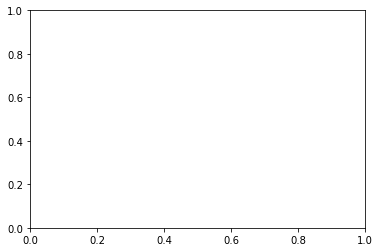

In [30]:
plt.scatter(loans_x_test, loans_y_test, color='black')

In [31]:
loans_x_train.describe()

,annual_income,dti
count,5.945460e+05,594546.000000
mean,7.504869e+04,18.141288
std,6.321379e+04,8.485663
min,1.200000e+03,0.000000
25%,4.500000e+04,11.920000
50%,6.500000e+04,17.650000
75%,9.000000e+04,23.950000
max,9.500000e+06,1092.520000


In [32]:
loans_y_train.describe()

count     594546
unique         2
top         True
freq      549245
Name: loan_status, dtype: object

In [ ]:
#For the sake of experimentation, I tried to predict the interest rate based on the 'dti' and the
#annual income. I wanted to see if 

In [33]:
loans = loanbook[['annual_inc', 'dti']]
loans.describe()

,annual_inc,dti
count,8.873830e+05,887383.000000
mean,7.502748e+04,18.157016
std,6.469811e+04,17.190591
min,0.000000e+00,0.000000
25%,4.500000e+04,11.910000
50%,6.500000e+04,17.650000
75%,9.000000e+04,23.950000
max,9.500000e+06,9999.000000


In [ ]:
loans_cl = loans.dropna()
loans_cl.describe()

In [36]:
interest_r = loanbook['int_rate'].map(lambda x: float(x.rstrip('%')))
interest_r.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [37]:
intloan_x_train, intloan_x_test, intloan_y_train, intloan_y_test = train_test_split(testval, interest_r, test_size = .33, random_state=42)

In [42]:
intloan_x_test.describe()

,annual_income,dti
count,2.928370e+05,292837.000000
mean,7.498441e+04,18.188949
std,6.761165e+04,27.373495
min,0.000000e+00,0.000000
25%,4.500000e+04,11.890000
50%,6.480000e+04,17.660000
75%,9.000000e+04,23.940000
max,8.706582e+06,9999.000000


In [43]:
intloan_y_test.describe()

count    292837.000000
mean         13.248838
std           4.382038
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: int_rate, dtype: float64

In [38]:
regp = linear_model.LinearRegression()
regp.fit(intloan_x_train, intloan_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
print('Coefficients: \n', regp.coef_)
print('Mean squared error: %.2f' % np.mean((regp.predict(intloan_x_test)-intloan_y_test)*2))

Coefficients: 
 [ -3.29205027e-06   7.86844984e-02]
Mean squared error: 0.00


In [40]:
print('Variance score: %.2f' % regp.score(intloan_x_test, intloan_y_test))

Variance score: -0.19


ValueError: x and y must be the same size

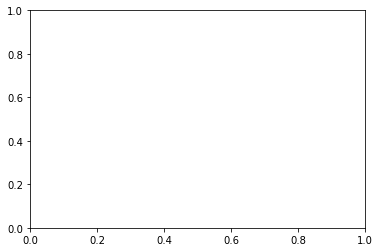

In [41]:
plt.scatter(intloan_x_test, intloan_y_test, color='black')
plt.plot(intloan_x_test, regp.predict(intloan_x_test), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
intloan_y_test.describe()